# Video: Modeling Time Series with Facebook Prophet

Facebook Prophet is a convenient Python library for time series forecasting that makes it easy to handle seasonality and trends.

## What is Facebook Prophet?

* Python library to make time series forecasting really easy.
* "Forecasting at Scale"
  * Scale up number of people making forecasts
  * Scale up handling of idiosyncratic time series features

Script:
* Facebook Prophet is a Python library that was written by Meta to make time series forecasting really easy.
* They wanted lots of people to make and tweak forecasts with little knowledge of time series.
* And they wanted to automatically handle most of the idiosyncratic features that come up a lot in time series analysis.

## Boston Daily Temperatures


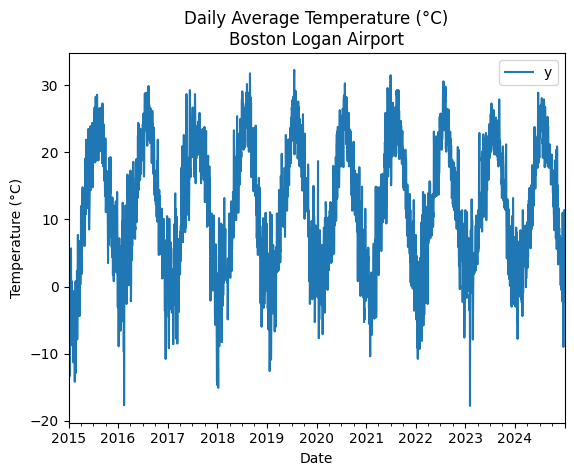

In [ ]:
# https://chatgpt.com/share/6845efdb-f5a4-800c-b03a-442128854276

import logging
import time

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from prophet import Prophet

logging.getLogger("prophet").setLevel(logging.WARNING)
logging.getLogger("cmdstanpy").disabled=True

# cached GitHub copy
boston_data = pd.read_csv("https://github.com/bu-cds-omds/dx704-examples/raw/refs/heads/main/data/boston-temperatures.tsv", sep="\t")

# rename columns for prophet
boston_data["date"] = pd.to_datetime(boston_data["date"], format="%Y-%m-%d")
boston_data = boston_data.rename(mapper={"date": "ds", "temperature": "y"}, axis=1)

boston_data.set_index("ds").plot();
plt.title("Daily Average Temperature (°C)\nBoston Logan Airport")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

plt.show();

Script:
* I am going to show you how to take this raw temperature data from Boston, model it with Facebook Prophet, and forecast the next year of temperatures.
* Then we will dig into what features Prophet found and used in that forecast, and make up our own minds whether it was a good forecast.

Script: (switch to screencast)
* The first thing we will do with this data is fit a model with Prophet.
* This should look pretty similar to using scikit-learn.


In [ ]:
boston_model = Prophet()
boston_model.fit(boston_data)

Script:
* Next we will setup the forecast for the next 365 days.

In [ ]:
boston_future = boston_model.make_future_dataframe(periods=365)
boston_forecast = boston_model.predict(boston_future)
boston_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,9.582376,-5.971700,4.492128,9.582376,9.582376,-10.280409,-10.280409,-10.280409,0.282284,0.282284,0.282284,-10.562693,-10.562693,-10.562693,0.0,0.0,0.0,-0.698033
1,2015-01-02,9.587854,-6.198916,4.164445,9.587854,9.587854,-10.511958,-10.511958,-10.511958,0.162327,0.162327,0.162327,-10.674285,-10.674285,-10.674285,0.0,0.0,0.0,-0.924105
2,2015-01-03,9.593331,-6.366234,3.571066,9.593331,9.593331,-11.050243,-11.050243,-11.050243,-0.269692,-0.269692,-0.269692,-10.780551,-10.780551,-10.780551,0.0,0.0,0.0,-1.456912
3,2015-01-04,9.598808,-6.621458,3.601958,9.598808,9.598808,-11.156834,-11.156834,-11.156834,-0.276043,-0.276043,-0.276043,-10.880791,-10.880791,-10.880791,0.0,0.0,0.0,-1.558026
4,2015-01-05,9.604285,-6.774203,3.398075,9.604285,9.604285,-11.117176,-11.117176,-11.117176,-0.142742,-0.142742,-0.142742,-10.974434,-10.974434,-10.974434,0.0,0.0,0.0,-1.512891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2025-12-27,11.880680,-3.096558,6.935314,11.749240,12.007034,-10.256536,-10.256536,-10.256536,-0.269692,-0.269692,-0.269692,-9.986844,-9.986844,-9.986844,0.0,0.0,0.0,1.624145
4014,2025-12-28,11.880440,-3.733508,6.552248,11.748626,12.007008,-10.387545,-10.387545,-10.387545,-0.276043,-0.276043,-0.276043,-10.111502,-10.111502,-10.111502,0.0,0.0,0.0,1.492895
4015,2025-12-29,11.880200,-3.563165,7.001454,11.747713,12.007053,-10.377988,-10.377988,-10.377988,-0.142742,-0.142742,-0.142742,-10.235246,-10.235246,-10.235246,0.0,0.0,0.0,1.502212
4016,2025-12-30,11.879960,-3.809212,6.602436,11.746877,12.007787,-10.435479,-10.435479,-10.435479,-0.078409,-0.078409,-0.078409,-10.357070,-10.357070,-10.357070,0.0,0.0,0.0,1.444480


Script:
* The forecast includes a lot of information about how the forecast was assembled.
* The actual prediction is all the way on the right in the column `yhat`.
* One thing that I was surprised to see here were some columns referring to weekly trends.
* As far as I know, the day of the week should not affect the temperature.
* Let's come back to that thought later and look at the forecast now.

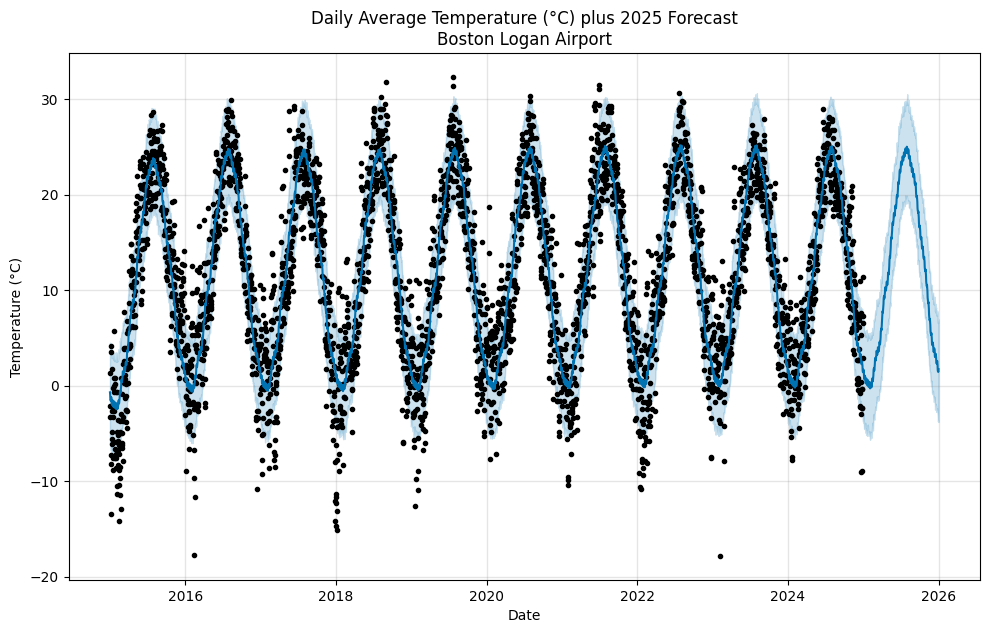

In [ ]:
boston_model.plot(boston_forecast)

plt.title("Daily Average Temperature (°C) plus 2025 Forecast\nBoston Logan Airport")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

plt.plot();

Script:
* At a glance, that looks reasonable.
* Seems like most of the temperature movement appears to follow annual patterns.
* Though it does seem to be consistently missing the coldest days of the year.
* Let's look at the components of this forecast.

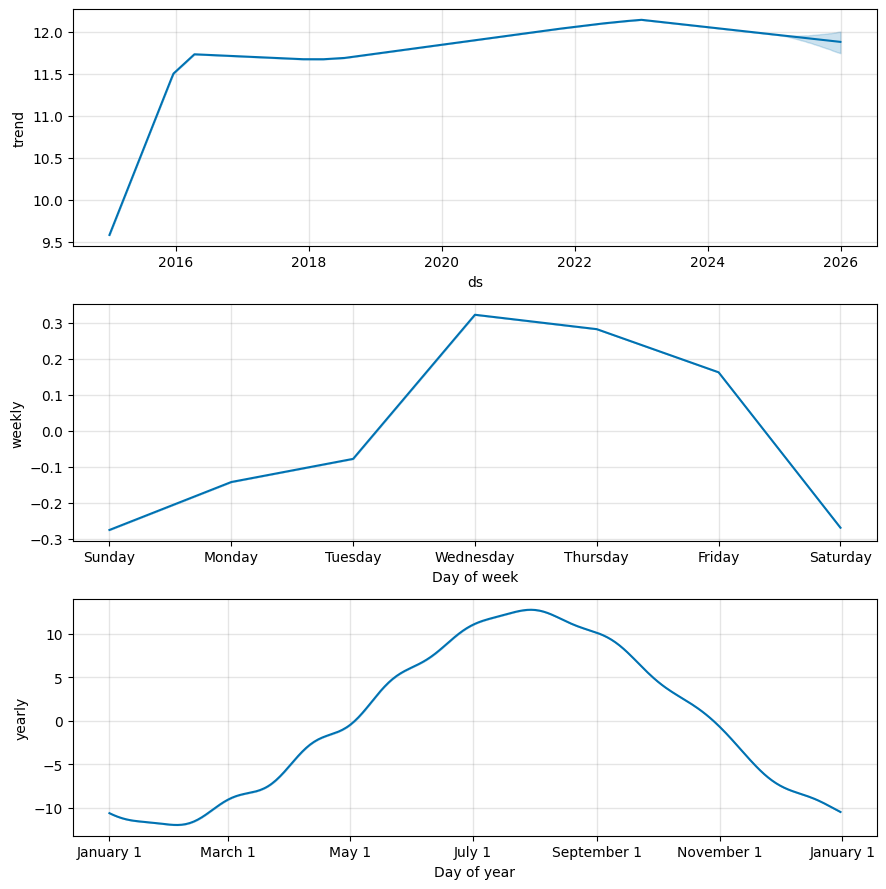

In [ ]:
boston_model.plot_components(boston_forecast);

Script:
* There are two things that I want to call out in these trends.
* First, the overall trend seems to have stepped up and then plateaued recently.
* It looks like it even dipped half a degree Celsius in 2024, but that is tiny compared to the increase in 2016.
* Is that right?
* Second, there is a weekly pattern where Wednesday is more than half a degree hotter than Saturday and Sunday.
* This temperature sensor is at the airport, so maybe it is somehow affected by airplane traffic.
* It is not a big effect, but that seems suspicious to me.
* So let's rerun the model without a weekly component.

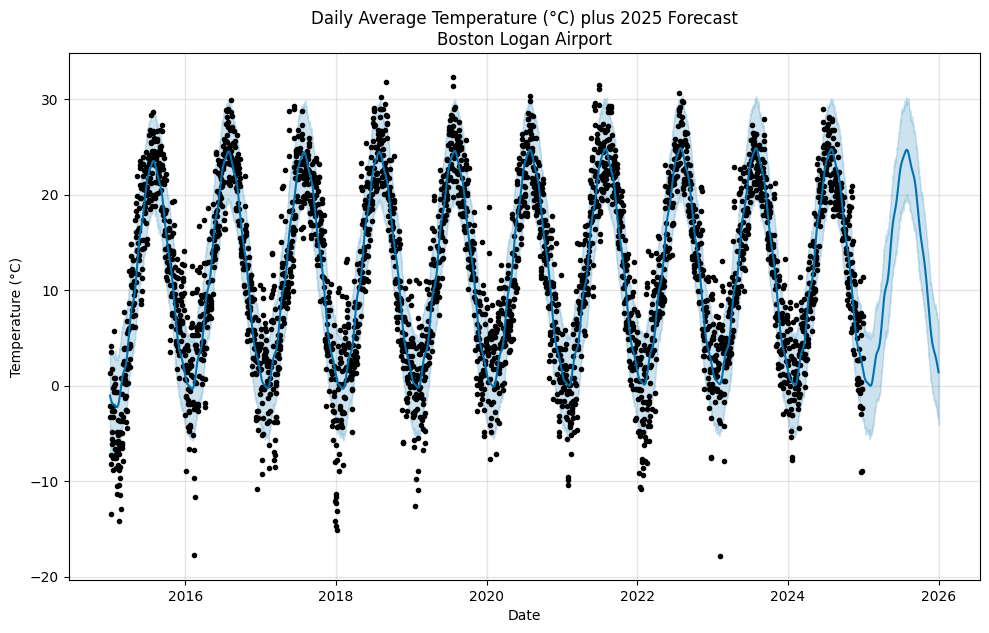

In [ ]:
boston2_model = Prophet(weekly_seasonality=False)
boston2_model.fit(boston_data)

boston2_future = boston2_model.make_future_dataframe(periods=365)
boston2_forecast = boston2_model.predict(boston2_future)
boston2_model.plot(boston2_forecast)

plt.title("Daily Average Temperature (°C) plus 2025 Forecast\nBoston Logan Airport")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

plt.plot();

Script:
* All I did to get a model without weekly seasonality included was add a parameter `weekly_seasonality` when creating the model object and set it to `False`.
* This was one of goals of the Prophet design was to make it easy to make these changes.
* And eyeballing the resulting forecast still seems reasonable, so it does not look like it hurt much to remove weekly seasinality.
* Let's look at the components again.

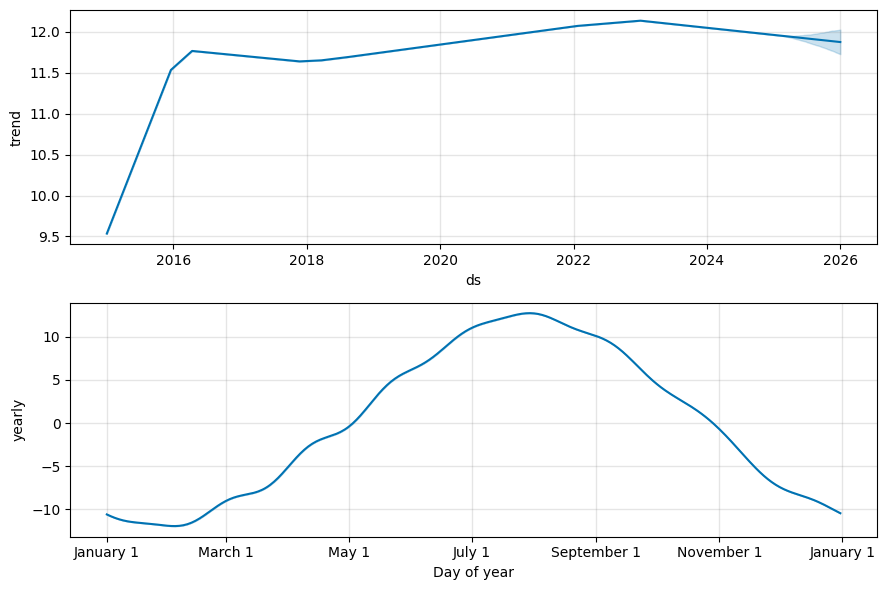

In [ ]:
boston2_model.plot_components(boston2_forecast);

Script:
* The annual pattern looks fine to me.
* Boston is bitterly cold in February and baking in August.
* The slight ebb in the 2024 trend is still present.
* Also while we are looking at it, note that the forecast for 2025 has a cone of uncertainty that grows the farther it gets from the training data.
* That will be a regular feature of time series predictions.
* Forecasting farther in the future is always harder.
* Let's do one more sanity check before wrapping up.
* Can we see this trend in the raw data?

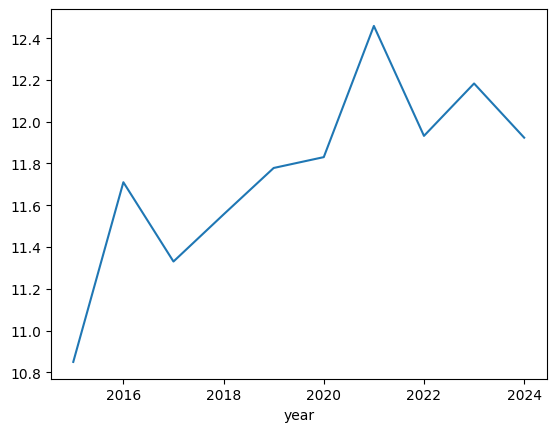

In [ ]:
boston_data["year"] = pd.to_datetime(boston_data["ds"]).dt.year
boston_data.groupby("year")["y"].mean().plot()
plt.show()

Script:
* Looking at the average temperature per year in the training data, 2015 did average colder, and the last few years were noisy, but slightly downward trending.

Script:
* As you saw, Facebook Prophet is a library that makes basic time series analysis easy.

https://github.com/bu-cds-omds/dx704-examples/blob/main/week02/video_modeling_time_series_with_facebook_prophet.ipynb